
# PCA降维{非监督学习}
利用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

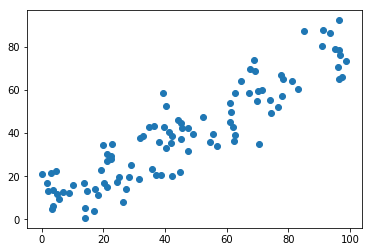

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100,size=100)
X[:,1] = 0.75 * X[:,0] +3. +np.random.normal(0,10.,size=100)
#有线性关系，降维效果明显
plt.scatter(X[:,0],X[:,1])
plt.show()

#### 1.demean。每个样本的每个特征减去这个特征的均值
在demean后，样本的每个特征的mean都为0

In [3]:
#np.mean(X,axis=0)，第一维方向的mean{对两列计算均值，剩下第一位}
def demean(X):
    return X-np.mean(X,axis=0)

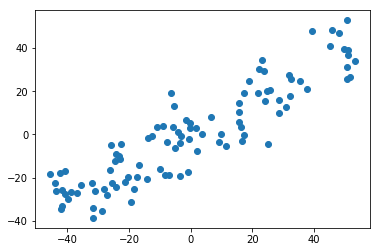

In [4]:
X_demean = demean(X)
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()#可以看见，只是坐标轴变了

### 2.梯度上升法

##### 目标函数

In [5]:
def f(X,w):#目标函数
    return np.sum((X.dot(w)**2))/len(X)

In [6]:
def df(X,w):#△f
    return X.T.dot(X.dot(w))*2./len(X)

In [7]:
def df_debug(X,w,epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_plus = w.copy()
        w_minus = w.copy()
        w_plus[i] +=epsilon
        w_minus[i] -=epsilon
        res[i] = (f(X,w_plus) - f(X,w_minus)) / (2*epsilon)
    return res

In [8]:
def diretion(w):
    return w/np.linalg.norm(w)
def GA(df,X,initial_w,eta,n_iters = 1e4,epsilon=1e-8):
    w = diretion(initial_w)
    #如果我们不做diretion，理所应当需要eta很小，会使搜索次数变多
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(X,w)
        last_w = w
        w = w + eta * gradient#梯度上升
        w = diretion(w)#注意1：应该让w成为一个表方向的单位向量
        if(abs(f(X,w) - f(X,last_w)) < epsilon):
            break
        cur_iter += 1
    return w

### 使用我们的PCA

In [9]:
import numpy as np

#初始化的w,已应该随机化一个
#注意2，初始化的值不能为0
eta = 0.0001#注意3：不能对数据进行归一化操作
initial_w = np.random.random(X.shape[1])
initial_w

array([0.53866379, 0.05976192])

In [10]:
GA(df_debug,X_demean,initial_w,eta)

array([0.7894803, 0.6137759])

In [11]:
GA(df,X_demean,initial_w,eta)

array([0.7894803, 0.6137759])

### 批量梯度上升法，求二维数据的，第一主成分

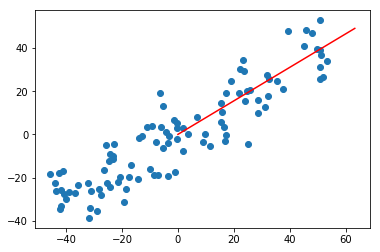

In [12]:
#可视化
w = GA(df_debug,X_demean,initial_w,eta)
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*80],[0,w[1]*80],color='r')#第一个主成分
plt.show()

### 极端数据测试

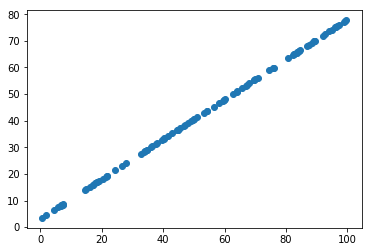

In [13]:
X2 = np.empty((100,2))#创建空数组
X2[:,0] = np.random.uniform(0.,100.,size=100)#生成一个实数
X2[:,1] = 0.75 * X2[:,0] + 3.
plt.scatter(X2[:,0],X2[:,1])
plt.show()

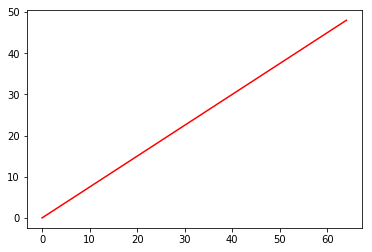

In [14]:
X2_demean = demean(X2)
w2 = GA(df,X2_demean,initial_w,eta)
plt.plot([0,w2[0]*80],[0,w2[1]*80],color='r')
plt.show()

## 求数据的前N个主成分
求出第一主成分以后，将数据进行改变，把数据在第一个主成分上的分量去掉

求主成分的模：$ X^{(i)}·w=||X_{project}^{(i)}||$ 

求主成分所在的向量：$X_{project}^{(i)}=||X_{project}^{(i)}||·w$

去除数据在第一主成分上的分量去掉：$X^{’(i)}=X^{(i)}-X_{project}^{(i)}$

在我们得出的新的数据$X^{’(i)}$上求第一主成分，就是原来的数据的第二主成分

### 获得前N个主成分

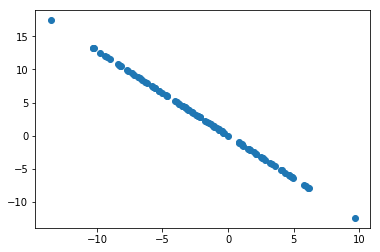

In [15]:
#使用之前写的代码：
w = GA(df,X_demean,initial_w,eta)#第一主成分
X2 = np.empty(X.shape)#初始化一个空矩阵
'''
for i in range(len(X)):#对每一个样本
    X2[i] = X[i] - X[i].dot(w)*w#Xi-Xproject
'''
#将上式重写
X2 = X - X.dot(w).reshape(-1,1) * w

plt.scatter(X2[:,0],X2[:,1])
plt.show()#一个向量减去一个向量,理所当然结果是与其垂直的向量

In [16]:
w2= GA(df,X2,initial_w,eta)#第一主成分
w2

array([ 0.61383359, -0.78943544])

In [17]:
### 验证第一主成分与第二主成分是否垂直
w.dot(w2)*np.cos(90)#结果约为0

-3.274180445375443e-05

In [18]:
def first_n_components(n,X,eta = 0.001,n_iters=1e4,epsilon=1e-8):
    X_pca = X.copy()#以后的计算都是用X_pca
    X_pca = demean(X_pca)
    res = []#用来存前n个主成分的列表
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])#随机初始化一个搜索点
        w = first_component(X_pca,initial_w,eta)
        res.append(w)#求出主成分对应的方向
        X_pca = X_pca - X_pca.dot(w).reshape(-1,1)*w
    return res
    

def f(X,w):
    return np.sum((X.dot(w)**2))/len(X)

def df(X,w):#△f
    return X.T.dot(X.dot(w))*2./len(X)

def demean(X):
    return X-np.mean(X,axis=0)
def diretion(w):
    return w/np.linalg.norm(w)

def first_component(X,initial_w,eta,n_iters = 1e4,epsilon=1e-8):
    w = diretion(initial_w)
    #如果我们不做diretion，理所应当需要eta很小，会使搜索次数变多
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(X,w)
        last_w = w
        w = w + eta * gradient#梯度上升
        w = diretion(w)#注意1：应该让w成为一个表方向的单位向量
        if(abs(f(X,w) - f(X,last_w)) < epsilon):
            break
        cur_iter += 1
    return w

In [19]:
first_n_components(2,X)

[array([0.78947754, 0.61377945]), array([ 0.61379977, -0.78946174])]

### 封装自己的求前N个主成分的类
样本数据假设有m行n列，即m个样本，n个特征。则当我们求出来前k个主成分w，
w也是一个矩阵，他有k行n列{即每个主成分和原始数据集一样，拥有相同的维度，只是对于我们的所求来说，前k个方向（即pca映射的方向）更加重要}

#### 对于样本X来说，求出来前K个主成分的目的，应该是要把它降到k维
因此，我们实际上要把m*n转化为m*k，我们实际求出来的$w_{k}$是k*n(特征数不变)

所以,$X_{k} = X·W_{k}^{T}$

#### 降维过后还要恢复
m*k · k*n = m*n
$W_{k}·X_{k}$

### 我的PCA过程
```
1.用户传来获得前N个主成分的N值
2.demean(X)获得X_PCA
3.根据N值，empty一个n行，列数等于特征数的空数组
4.对于N值进行循环
    1.每轮循环随机一个搜索方向，作为起始搜索方向
    2.使用梯度上升搜索此时的PCA的第一主成分
       1.设置学习率，学习次数，极限大小
       2.每轮需要把w变成单位向量(让其只表示搜索方向)
       3.对目标函数求梯度上升，直到达到学习次数，学习空间小于极限值
       4.注：不能对数据进行归一化（已经demean过）
    3.把得到的主成分存在我们empty的数组的对应行
    4.计算新的X_pca
5.返回self

transform(把用户的数据集隐射到PCA的各个主成分分量里)
对应的还有升维
```
自己封装的代码
```python
import numpy as np
class PCA:
    def __init__(self,n_components):#第一个组件
        assert n_components >=1 ,"n_componennts must be valid"
        self.n_components=n_components
        self.components_ = None

    def fit(self,X,eta=0.001,n_iters=1e4):
        assert self.n_components<=X.shape[1],\
            "n_components must not be greater than the feature number of X"

        def first_n_components(n, X, eta=0.001, n_iters=1e4, epsilon=1e-8):
            X_pca = X.copy()  # 以后的计算都是用X_pca
            X_pca = demean(X_pca)
            res = []  # 用来存前n个主成分的列表
            for i in range(n):
                initial_w = np.random.random(X_pca.shape[1])  # 随机初始化一个搜索点
                w = first_component(X_pca, initial_w, eta)
                res.append(w)  # 求出主成分对应的方向
                X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
            return res

        def f(X, w):
            return np.sum((X.dot(w) ** 2)) / len(X)

        def df(X, w):  # △f
            return X.T.dot(X.dot(w)) * 2. / len(X)

        def demean(X):
            return X - np.mean(X, axis=0)

        def diretion(w):
            return w / np.linalg.norm(w)

        def first_component(X, initial_w, eta=0.001, n_iters=1e4, epsilon=1e-8):
            w = diretion(initial_w)
            # 如果我们不做diretion，理所应当需要eta很小，会使搜索次数变多
            cur_iter = 0
            while cur_iter < n_iters:
                gradient = df(X, w)
                last_w = w
                w = w + eta * gradient  # 梯度上升
                w = diretion(w)  # 注意1：应该让w成为一个表方向的单位向量
                if (abs(f(X, w) - f(X, last_w)) < epsilon):
                    break
                cur_iter += 1
            return w

        X_pca = demean(X)
        self.components_ = np.empty(shape=(self.n_components,X.shape[1]))
        for i in range(self.n_components):
            initial_w = np.random.random(X_pca.shape[1])
            w = first_component(X_pca,initial_w,eta,n_iters)
            self.components_[i,:] = w

            X_pca = X_pca - X_pca.dot(w).reshape(-1,1) * w
        return self

    def transform(self,X):#对于用户的数据集，隐射到主成分分量中
        assert X.shape[1] == self.components_.shape[1]

        return X.dot(self.components_.T)

    def inverse_transform(self,X):
        assert X.shape[1] == self.components_.shape[0]

        return  X.dot(self.components_)

    def __repr__(self):
        return "PCA(n_components=%d)" % self.n_components

```

In [20]:
# 使用我们自己的pca
from ML.PCA import PCA
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [21]:
pca.components_

array([[0.78947767, 0.61377928]])

In [22]:
X_resuction = pca.transform(X)
X_resuction.shape

(100, 1)

##  skikit-learn中的PCA

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)
print(pca.components_)##方向和我们相反
X_transform = pca.transform(X)
print(X_transform.shape)
X_restore = pca.inverse_transform(X_resuction)
print(X_restore.shape)

[[0.7894781  0.61377873]]
(100, 1)
(100, 2)


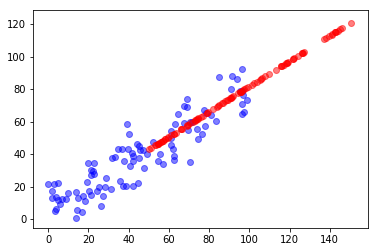

In [24]:
#绘制一下散点图
plt.scatter(X[:,0],X[:,1],color='b',alpha=0.5)
plt.scatter(X_restore[:,0],X_restore[:,1],color='r',alpha=0.5)
plt.show()

### 真实数据集测试sklearn中的PCA

In [25]:
#手写识别数据集
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [26]:
%%time
#回忆一下KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

Wall time: 8.02 ms


In [27]:
knn.score(X_test,y_test)

0.9844444444444445

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)#要用X_train,fit的pca来映射X_test的数据集


In [29]:
%%time
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_reduction,y_train)

Wall time: 2.51 ms


In [30]:
knn_pca.score(X_test_reduction,y_test)

0.5822222222222222

#####  降维的最佳维度很明显是一个超参数，太小的化，虽然效率高，但是精度低

In [31]:
#sklearn提供的方法：
#返回维持原来数据方差的百分比，越大越好
pca.explained_variance_ratio_

array([0.14783371, 0.13757073])

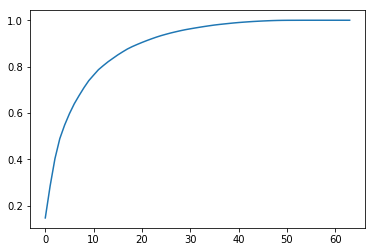

In [32]:
#利用pca.explained_variance_ratio_反应主成分的重要性
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_#重要程度依次递减，所以我们可以舍弃一些主成分
plt.plot([i for i in range(X_train.shape[1])]
         ,[np.sum(pca.explained_variance_ratio_[:i+1]) #前i个轴解释的方差的和
           for i in range(X_train.shape[1])])
plt.show()#每个横轴对应的是保留的主成分的个数，纵轴是保留的方差信息

In [33]:
#### 通封装了pca.explained_variance_ratio_，选择最佳的维度
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pca.n_components_#返回保留0.95的信息需要最少的维度数

28

In [35]:
#pca我们的样本
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [36]:
%%time
#与全样本相比，效率快一倍
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_reduction,y_train)

Wall time: 5.51 ms


In [37]:
#损失了0.0022
knn_pca.score(X_test_reduction,y_test)

0.9866666666666667

### 降到二维的意义
很明显，数据可视化

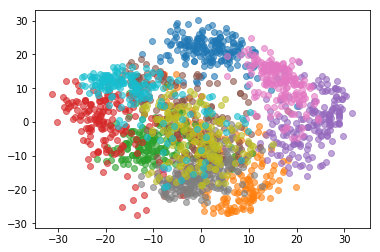

In [40]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)
for i in range(10):
    plt.scatter(X_reduction[y==i,0],X_reduction[y==i,1],alpha=0.6)
plt.show()